# k-NEAREST NEIGHBORS

**File:** kNN.ipynb

**Course:** Industrial Data Mining Foundations

# IMPORT LIBRARIES

In [2]:
import matplotlib.pyplot as plt                      # For plotting data
import seaborn as sns                                # For plotting data
import pandas as pd                                  # For dataframes
from sklearn.model_selection import GridSearchCV     # For parameter optimization
from sklearn.neighbors import KNeighborsClassifier   # For kNN classification
from sklearn.metrics import ConfusionMatrixDisplay   # Evaluation measure

# LOAD AND PREPARE DATA
Load the training data `trn` and testing data `tst` from the CSV files in the data directory. Separate the data matrix from the class variable.

In [3]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('G:/Pengmasy SDT/PB_BB1.csv')
# Specifies X by filtering all columns with a number in name
X_trn, X_tst, y_trn, y_tst = train_test_split(data, data.Keterangan, test_size = 0.30, random_state=100)

In [4]:
data

,Gender,Tinggi Badan (cm),Berat Badan (kg),Keterangan
0,0,49.0,2.1,0
1,0,49.0,2.5,1
2,0,49.0,4.0,2
3,0,49.0,4.1,3
4,0,49.5,2.1,0
...,...,...,...,...
1059,1,114.5,24.3,3
1060,1,115.0,15.1,0
1061,1,115.0,16.8,1
1062,1,115.0,24.4,2


Text(0.5, 1.0, 'Distribusi Pada Data Status Gizi berdasarkan berat badan terhadap tinggi badan')

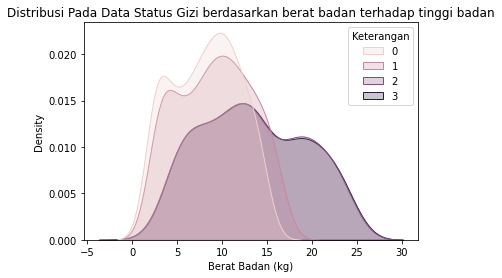

In [8]:
sns.kdeplot(data=data, x='Berat Badan (kg)', hue='Keterangan', shade=True)
plt.title("Distribusi Pada Data Status Gizi berdasarkan berat badan terhadap tinggi badan")

Look at the first few rows of the training data.

In [5]:
y_trn = pd.DataFrame(y_trn)
y_tst = pd.DataFrame(y_tst)
y_tst

,Keterangan
288,0
985,1
173,1
714,2
700,0
...,...
23,3
1011,3
109,1
329,1


# kNN: TRAIN MODEL
To train a kNN model, set up a `KNeighborsClassifier` object and fit it to training data.

In [6]:
# Sets up a kNN model and fits it to data
knn = KNeighborsClassifier(n_neighbors=4) \
    .fit(X_trn, y_trn)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Calculate Mean Accuracy on Training Data

In [7]:
print(
    'Accuracy on training data: ' 
    + str("{:.2%}".format(knn.score(X_trn, y_trn))))

Accuracy on training data: 99.19%


## Optimize the kNN Model
The challenge in training a kNN model is to determine the optimal number of neighbors. To find the optimal parameters, `GridSearchCV` object can be used.

In [8]:
# Sets up the kNN classifier object
knn = KNeighborsClassifier() 

# Search parameters
param = range(3, 15, 2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    knn,
    {'n_neighbors': param})

# Fits the grid object and gets the best model
best_knn = grid \
    .fit(X_trn,y_trn) \
    .best_estimator_

# Displays the optimum model
best_knn.get_params()

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:215: 

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

## Plot the Accuracy by Neighbors Parameter
Once the optimal parameters are found, the accuracy for different parameters can be compared by plotting. The `grid` variable has an attribute `cv_results_`, which is a dictionary of key value pairs and stores the cross validation accuracy for each parameter.

# TEST MODEL
In this phase, we'll evaluate the accuracy of the trained kNN model on the test set. A good evaluation measure is the `confusion matrix` that gives the fraction of true positives, true negatives, false positives, and false negatives.

## Visualize the Confusion Matrix

Normalize the scores to display as proportions across rows.

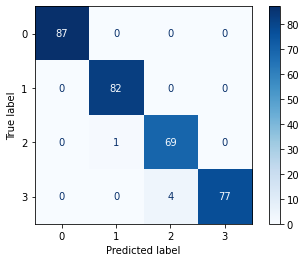

In [9]:
pred = best_knn.predict(X_tst)

ConfusionMatrixDisplay.from_predictions(
    y_tst,
    pred,
    cmap='Blues'
)

## Calculate Mean Accuracy on Testing Data

In [10]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_knn.score(X_tst, y_tst))))

Accuracy on testing data: 98.44%


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_tst, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       0.99      1.00      0.99        82
           2       0.95      0.99      0.97        70
           3       1.00      0.95      0.97        81

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.